Team Members: William Bolder, Jongin Choi, Gianna Delorenzo, Naman Joshi, Ryan Kaye, and Darren Zhu  
Course: DS 220   
Instructor: Professor Fonkam  
Date: December 7, 2023
# Rental Data Analysis of US Cities and States  
## **Introduction**
This project aims to analyze a real estate data set consisting of rent prices for major US cities between January 2015 to October 2023. The data set includes information on the Region Name (city), State, County Name, rent, etc. This data set was obtained from https://www.zillow.com/research/data/.  
First, we will import pandas and load the rental data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('City_zori_uc_sfrcondomfr_sm_month.csv')

### **Question 1: Which state has the highest average rent?**   
1. To find the state with the highest average rent and also the corresponding rent value, first, identify the most recent date (`columns[-1]`) from the data set, which is October 2023.  
2. Second, initialize a dictionary to hold the total rent values for each state.  
3. Then, since we want to perform operations on each row of the data, we will use `iterrows()` in the for loop to iterate over each data frame row, which will yield an index and row data.  
4. The for loop will get the state and rent. If the rent is already in the dictionary `rent_sums`, it will add the rent value, else, it will initialize a new value.

In [ ]:
most_recent = data.columns[-1]

# initialize dictionary
rent_sums = {}

# for each row in the data...
for index, row in data.iterrows():
    # get state and most recent rent
    state = row['State']
    rent = row[most_recent]

    # if the rent is already in dictionary add
    if state in rent_sums:
        rent_sums[state] += rent

    # else initialize
    else:
        rent_sums[state] = rent

5. Once the rent sum of each state is calculated, calculate the average rent for each state.
6. First, count the number of unique cities for each state with `value_counts()` and then initialize a dictionary to hold the average state rents.  
7. Then, in a for loop, for each state in the rent_sums dictionary, calculate the total rent, get the count of unique cities, calculate the average rent, and store the average rent in the `avg_state_rent` dictionary.
8. For the final step, the state (max key) and the corresponding rent value, then print out the results.


In [ ]:
# count the number of unique "cities" for each state with value_counts()
state_rent_count = data['State'].value_counts()

# initialize dictionary
avg_state_rent = {}

# for each state in rent_sums...
for state in rent_sums:
    total_rent = rent_sums[state] # total rent for state
    city_count = state_rent_count[state] # get the count (number of cities) for state
    avg_rent = total_rent / city_count # calculate the average rent
    avg_state_rent[state] = avg_rent # store info in dictionary

# highest rent state and the average rent value
highest_rent_state = max(avg_state_rent, key = avg_state_rent.get)
highest_avg_rent = max(avg_state_rent.values())

print(f"The state with the highest average rent is {highest_rent_state} with an average rent of ${highest_avg_rent:.2f}")

The state with the highest average rent is NY with an average rent of $6153.50


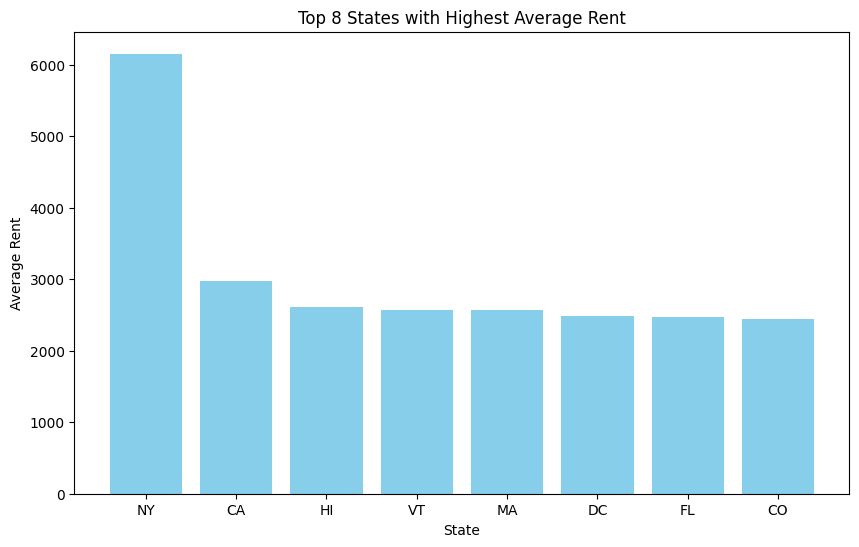

New York State is vastly higher than the other highest average rent states, and the graph below demonstrates that well.


In [ ]:
# Convert the 'avg_state_rent' dictionary to a DataFrame for easier plotting
avg_rent_df = pd.DataFrame(list(avg_state_rent.items()), columns=['State', 'AverageRent'])

# Sort the DataFrame based on AverageRent and select the top 3
avg_rent_df = avg_rent_df.sort_values(by='AverageRent', ascending=False).head(8)

# Create a bar plot for the top 3 states
plt.figure(figsize=(10, 6))
plt.bar(avg_rent_df['State'], avg_rent_df['AverageRent'], color='skyblue')
plt.title('Top 8 States with Highest Average Rent')
plt.xlabel('State')
plt.ylabel('Average Rent')
plt.show()
print("New York State is vastly higher than the other highest average rent states, and the graph below demonstrates that well.")

### **Question 2: What state has the lowest average rent?**  

In [ ]:
lowest_rent_state = min(avg_state_rent, key = avg_state_rent.get)
lowest_avg_rent = min(avg_state_rent.values())

print(f"The state with the lowest average rent is {lowest_rent_state} with an average rent of ${lowest_avg_rent:.2f}")

The state with the lowest average rent is ND with an average rent of $936.70


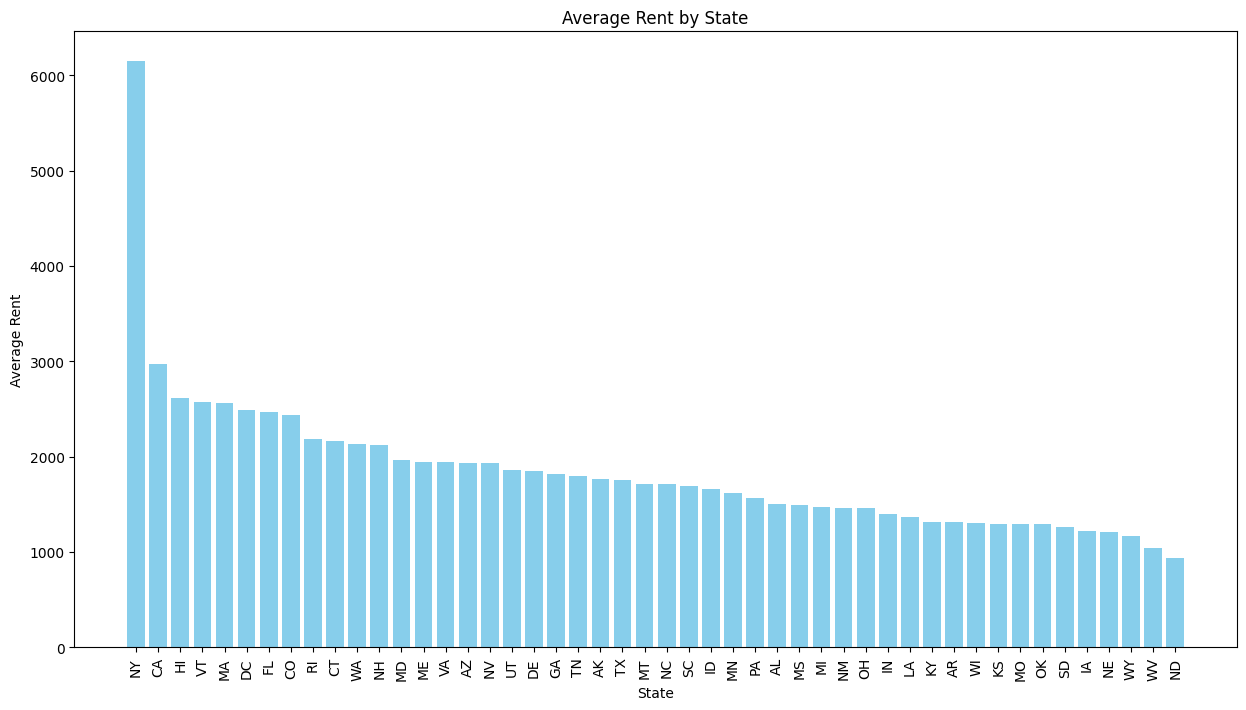

This visualization shows the massive discepency between the top states and ND


In [ ]:
# Convert the 'avg_state_rent' dictionary to a DataFrame for easier plotting
avg_rent_df = pd.DataFrame(list(avg_state_rent.items()), columns=['State', 'AverageRent'])

# Sort the DataFrame based on AverageRent to get a more informative plot
avg_rent_df = avg_rent_df.sort_values(by='AverageRent', ascending=False).head(48)

# Create a bar plot
plt.figure(figsize=(15, 8))
plt.bar(avg_rent_df['State'], avg_rent_df['AverageRent'], color='skyblue')
plt.title('Average Rent by State')
plt.xlabel('State')
plt.ylabel('Average Rent')
plt.xticks(rotation=90)  # Rotates the state names for better readability
plt.show()

print("This visualization shows the massive discepency between the top states and ND")

### **Question 3: What are the top 5 US cities with the highest rent prices?**
1. To find the top 5 US cities with the highest rent prices, first use the pandas `sort_values()` to sort the data in descending order.
2. Then, use the data frame `head(5)` to retrieve the first 5 rows of the sorted data.
3. Finally, in a for loop using `iterrows()` again, print out only the `RegionName` (City), `State`, and the most recent rent price.

In [ ]:
# sort data by most_recent in descending order
sort_data = data.sort_values(by=most_recent, ascending=False)

# get the top 5 using data frame head(5)
top_5_highest = sort_data.head(5)

print("The top 5 US cities with the highest rent prices are:")

# for each, only print RegionName, State, and rent
for index, row in top_5_highest.iterrows():
    print(f"{row['RegionName']}, {row['State']}: ${row[most_recent]:.2f}")


The top 5 US cities with the highest rent prices are:
Sagaponack, NY: $70166.50
Amagansett, NY: $66875.00
Bridgehampton, NY: $60000.00
Wainscott, NY: $45000.00
Water Mill, NY: $40000.00


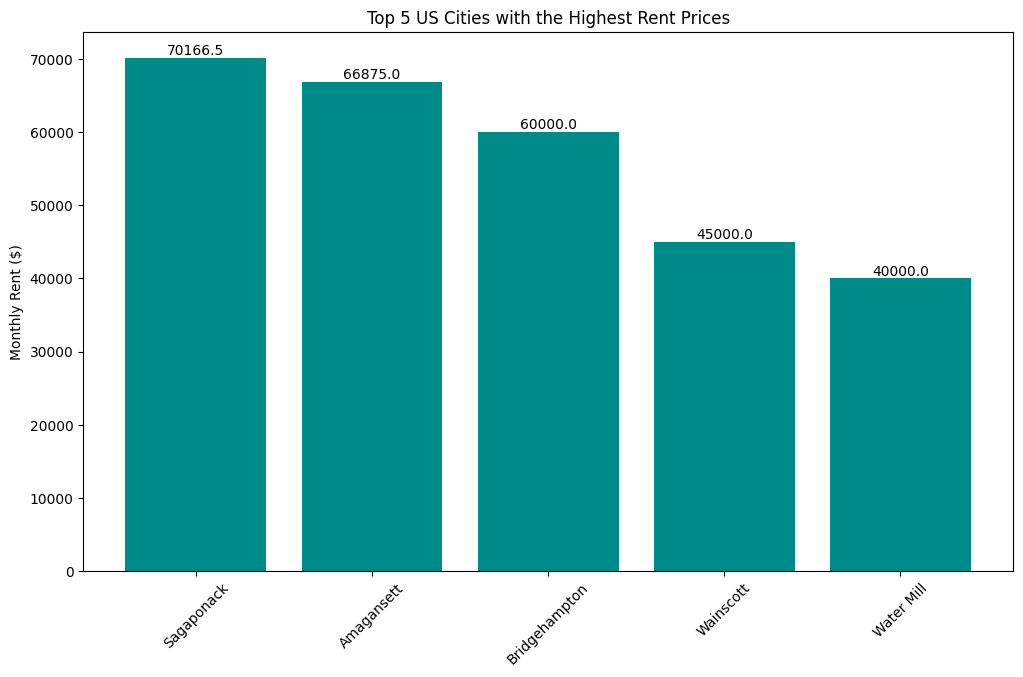

In [ ]:
# Create a vertical bar plot
plt.figure(figsize=(12, 7))
bars = plt.bar(top_5_highest['RegionName'], top_5_highest[most_recent], color='darkcyan')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.ylabel('Monthly Rent ($)')
plt.title('Top 5 US Cities with the Highest Rent Prices')
plt.show()


### **Question 4: Are there noticeable patterns in the rent prices over the years?**  
1. This question is looking to find the overall percent change in rent price from the first record in 2015 to the most current data available (2023-10-31).  
2. First, we would calculate the percent change in rent for each city. The general formula to calculate percent change is ((final value - initial value) / initial value) * 100. In this case, the initial value would be `2015-01-31`.  
3. Then, calculate the overall change in rent for all cities. To do so, use `mean()` to calculate the average overall change in rent for all cities.

In [ ]:
# calculate the percent change in rent for each city
initial_rent = data['2015-01-31']
final_rent = data[most_recent]

percent_change_rent = ((final_rent - initial_rent) / initial_rent) * 100

# calculate the overall change in rent for all cities
overall_change = percent_change_rent.mean()

print(f"The overall percent change in rent for all cities is {overall_change:.2f}%")

The overall percent change in rent for all cities is 70.30%


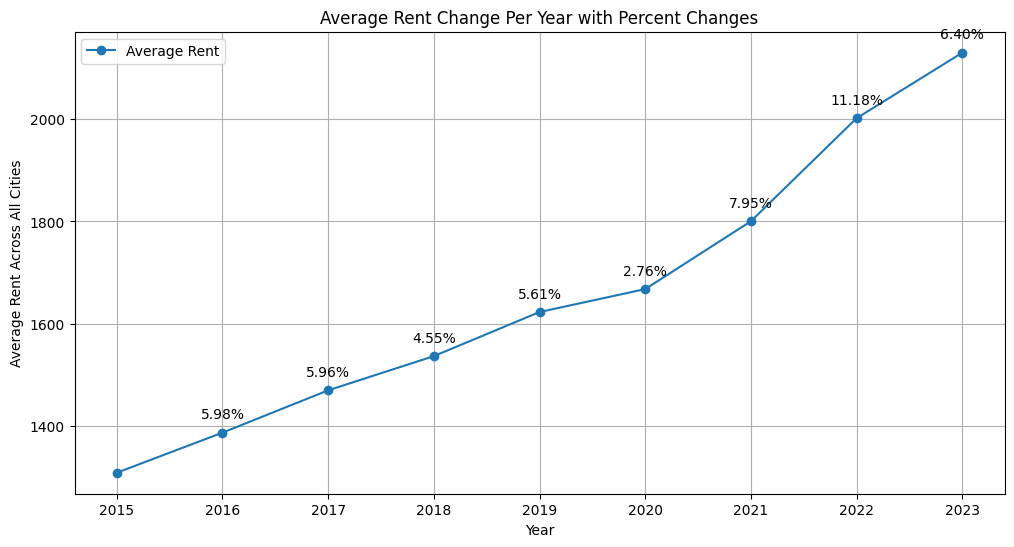

In [ ]:
# Calculate percent changes between consecutive years
percent_changes = {}

for i in range(1, len(years_list)):
    year = years_list[i]
    prev_year = years_list[i - 1]
    rent_current = average_rent_by_year[year]
    rent_previous = average_rent_by_year[prev_year]
    percent_change = ((rent_current - rent_previous) / rent_previous) * 100
    percent_changes[year] = percent_change

# Now plot the average rent per year with percent changes
plt.figure(figsize=(12, 6))
plt.plot(list(average_rent_by_year.keys()), list(average_rent_by_year.values()), marker='o', linestyle='-', label='Average Rent')
plt.xticks(ticks=years_list)  # Use the list of years for x-axis ticks
plt.title('Average Rent Change Per Year with Percent Changes')
plt.xlabel('Year')
plt.ylabel('Average Rent Across All Cities')
plt.grid(True)

# Add percent changes to the plot
for year, change in percent_changes.items():
    plt.annotate(f'{change:.2f}%', (year, average_rent_by_year[year]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.show()


### **Question 5: What is the change in average rent in State College, PA for the past year?**
1. We want to calculate the change in average rent prices in State College, PA from `2022-10-31` to `2023-10-31` (most current data).  
2. First, locate the data for State College by using `loc[]`.  
3. Once the data is located, the rent data for `2022-10-31` and `2023-10-31` is extracted using `iloc[]`.
4. Now, calculate the percent change in rent and the rent amount change for State College.

In [ ]:
# find the data for State College
state_college_info =  data.loc[data['RegionName'] == 'State College']

# extract data using .loc[]
rent_oct_2022 = state_college_info['2022-10-31'].iloc[0]
rent_current = state_college_info['2023-10-31'].iloc[0]

# calculate percent change and rent amount change
pct_change_state_college = ((rent_current - rent_oct_2022) / rent_oct_2022) * 100
rent_change_state_college = rent_current - rent_oct_2022

print(f"The percent change in average rent in State College, PA from 2022-10-31 to 2023-10-31 is {pct_change_state_college:.2f}%")
print(f"The average change in rent is ${rent_change_state_college:.2f}")

The percent change in average rent in State College, PA from 2022-10-31 to 2023-10-31 is 3.58%
The average change in rent is $61.67


We can see from the data visualization there isn't a massive increase in rent in the recent year


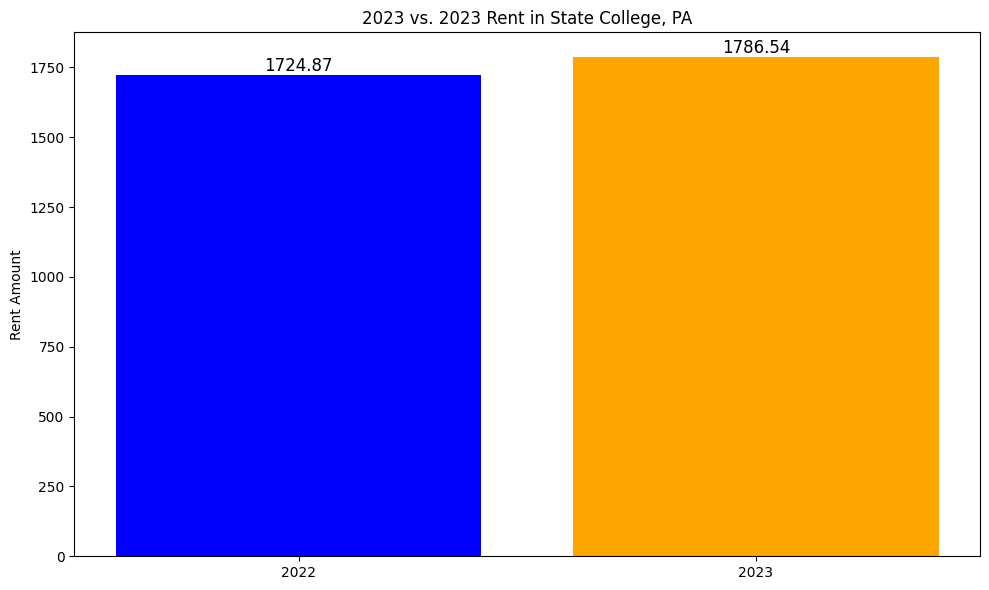

In [ ]:
# Create a bar chart for rent values (initial and current)
plt.figure(figsize=(10, 6))
bars = plt.bar(['2022', '2023'], [rent_oct_2022, rent_current], color=['blue', 'orange'])
plt.title('2023 vs. 2023 Rent in State College, PA')
plt.ylabel('Rent Amount')
# Add labels to the bars
for bar, value in zip(bars, [rent_oct_2022, rent_current]):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()

print("We can see from the data visualization there isn't a massive increase in rent in the recent year")

### **Question 6:** What is the most expensive metropolitan area?
1. First, group the data by the column 'Metro' while selecting the column 'most_recent,' and obtain the average value by using `mean()`
2. Sort the grouped values in descending order using `sort_values()`
3. Assign the highest sorted value to the variable head.
4. Print the head variable and the cost.

In [ ]:
group = data.groupby('Metro')[most_recent].mean()
sorted = group.sort_values(ascending = False)
head = sorted.head(1)
print(f"The most expensive metropolitan area is {head.index[0]}")
print(f"The cost of the most expensive metropolitan area is ${head[head.index[0]]:,.1f}")

The most expensive metropolitan area is Glenwood Springs, CO
The cost of the most expensive metropolitan area is $10,416.5


The most expensive metropolitan area is Glenwood Springs, CO
The cost of the most expensive metropolitan area is $10,416.5


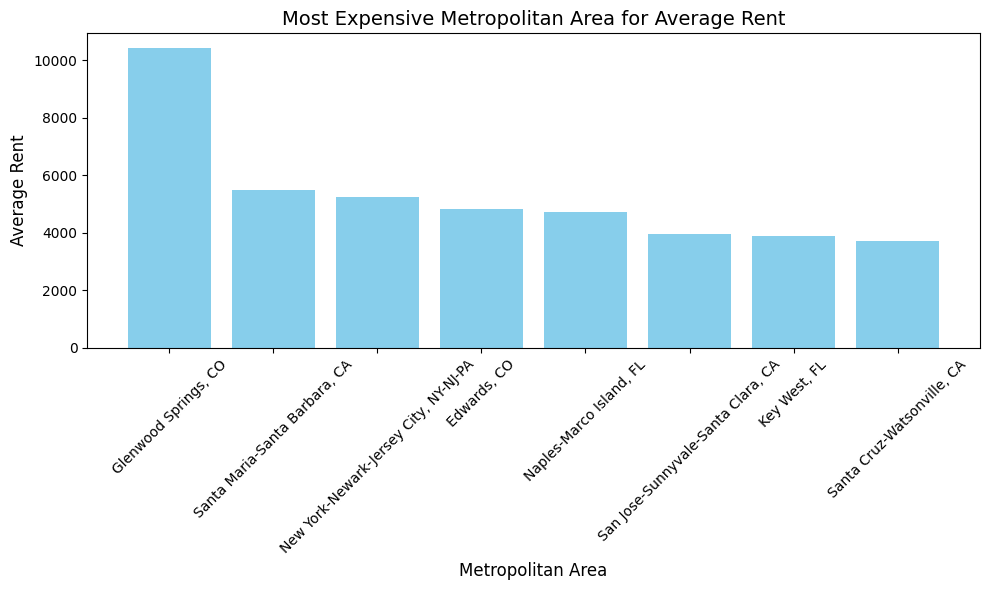

In [ ]:
import matplotlib.pyplot as plt

# Group data by 'Metro' and calculate the mean for the most recent date
group = data.groupby('Metro')[most_recent].mean()

# Sort the metropolitan areas by mean rent in descending order
sorted_group = group.sort_values(ascending=False)

# Select the top 1 most expensive metropolitan area
top_1 = sorted_group.head(8)

# Print the most expensive metropolitan area and its cost
print(f"The most expensive metropolitan area is {top_1.index[0]}")
print(f"The cost of the most expensive metropolitan area is ${top_1.values[0]:,.1f}")

# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))
plt.bar(top_1.index, top_1.values, color='skyblue')
plt.xlabel('Metropolitan Area', fontsize=12)
plt.ylabel('Average Rent', fontsize=12)
plt.title('Most Expensive Metropolitan Area for Average Rent', fontsize=14)
plt.xticks(rotation=45, fontsize=10)


plt.tight_layout()
plt.show()
